In [1]:
#importar bibliotecas
#!pip install -U scikit-learn
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression , Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , f1_score, precision_score, recall_score
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import  GridSearchCV , train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler ,PolynomialFeatures,normalize
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn import preprocessing
from pandas.plotting import autocorrelation_plot
from pandas.plotting import scatter_matrix
%matplotlib inline

In [2]:
df = pd.read_csv("dados/transformado.csv", sep=",")

In [3]:
#criando dataset auxiliar
df_aux = pd.DataFrame(df[(df['temporada']==2022)]).reset_index()

# eliminando valores de df_teste do dataset original
df_model = df.drop(index = df_aux.index)

#arrumando index de df_teste
df_aux.reset_index(inplace = True)
df_aux.drop('level_0', axis = 1, inplace = True)
df_aux.drop('index', axis = 1, inplace = True)



df_aux

,partida_id,rodada,mandante,visitante,formacao_mandante,formacao_visitante,vencedor,mandante_placar,visitante_placar,chutes_mandante,...,passes_visitante,precisao_passes_visitante,faltas_visitante,cartao_amarelo_visitante,cartao_vermelho_visitante,impedimentos_visitante,escanteios_visitante,temporada,resultado,total_gols
0,7646,1,Fluminense,Santos,3-4-2-1,4-4-2,-,0,0,26,...,286,0.71,18,0,0,4,1,2022,3,0
1,7647,1,Atletico-GO,Flamengo,4-2-3-1,3-2-4-1,-,1,1,10,...,502,0.87,11,2,0,2,10,2022,3,2
2,7648,1,Palmeiras,Ceara,4-3-3,4-3-3,Ceara,2,3,17,...,309,0.69,14,8,1,0,8,2022,2,5
3,7649,1,Coritiba,Goias,4-2-3-1,4-4-2,Coritiba,3,0,17,...,421,0.83,12,4,0,2,3,2022,1,3
4,7650,1,Botafogo-RJ,Corinthians,4-3-3,4-3-3,Corinthians,1,3,9,...,382,0.79,18,4,0,1,4,2022,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,8021,38,Cuiaba,Coritiba,4-1-4-1,4-1-4-1,Cuiaba,2,1,17,...,389,0.82,8,3,1,2,1,2022,1,3
376,8022,38,Bragantino,Fluminense,4-2-3-1,4-2-3-1,Fluminense,0,1,13,...,463,0.82,15,2,0,0,9,2022,2,1
377,8023,38,Corinthians,Atletico-MG,4-1-4-1,4-2-3-1,Atletico-MG,0,1,17,...,351,0.82,19,6,0,0,4,2022,2,1
378,8024,38,Internacional,Palmeiras,4-2-3-1,4-2-3-1,Internacional,3,0,15,...,306,0.82,17,3,0,2,5,2022,1,3


In [4]:
print("Temporada Modelo", df_model.temporada.unique(), " Qtd linhas x colunas", df_model.shape)
print("Temporada Auxiliar" , df_aux.temporada.unique() , " Qtd linhas x colunas",df_aux.shape)

Temporada Modelo [2019 2020 2021 2022]  Qtd linhas x colunas (1496, 33)
Temporada Auxiliar [2022]  Qtd linhas x colunas (380, 33)


In [5]:
#transformando as formações em dados numericos dop modelo
dt = pd.concat([df_model['formacao_mandante'],df_model['formacao_visitante']])

le = preprocessing.LabelEncoder()
le.fit(dt)
df_model['formacao_mandante'] = le.transform(df_model["formacao_mandante"])
df_model['formacao_visitante'] = le.transform(df_model["formacao_visitante"])


# Utilizando os vencedores para transformar os mandante visitantes e os vencedores
le.fit(df_model['vencedor'])
df_model['mandante'] = le.transform(df_model["mandante"])
df_model['visitante'] = le.transform(df_model["visitante"])
df_model['vencedor'] = le.transform(df_model["vencedor"])



df_model.tail()


,partida_id,rodada,mandante,visitante,formacao_mandante,formacao_visitante,vencedor,mandante_placar,visitante_placar,chutes_mandante,...,passes_visitante,precisao_passes_visitante,faltas_visitante,cartao_amarelo_visitante,cartao_vermelho_visitante,impedimentos_visitante,escanteios_visitante,temporada,resultado,total_gols
1871,8021,38,15,13,9,9,15,2,1,17,...,389,0.82,8,3,1,2,1,2022,1,3
1872,8022,38,8,17,11,11,17,0,1,13,...,463,0.82,15,2,0,0,9,2022,2,1
1873,8023,38,12,4,9,11,4,0,1,17,...,351,0.82,19,6,0,0,4,2022,2,1
1874,8024,38,21,23,11,11,21,3,0,15,...,306,0.82,17,3,0,2,5,2022,1,3
1875,8025,38,19,25,11,7,25,0,4,6,...,591,0.90,14,1,0,0,4,2022,2,4


In [6]:
#transformando as formações em dados numericos dop modelo
dt = pd.concat([df_aux['formacao_mandante'],df_aux['formacao_visitante']])

le = preprocessing.LabelEncoder()
le.fit(dt)
df_aux['formacao_mandante'] = le.transform(df_aux["formacao_mandante"])
df_aux['formacao_visitante'] = le.transform(df_aux["formacao_visitante"])


# Utilizando os vencedores para transformar os mandante visitantes e os vencedores
le.fit(df_aux['vencedor'])
df_aux['mandante'] = le.transform(df_aux["mandante"])
df_aux['visitante'] = le.transform(df_aux["visitante"])
df_aux['vencedor'] = le.transform(df_aux["vencedor"])



df_aux.tail()


,partida_id,rodada,mandante,visitante,formacao_mandante,formacao_visitante,vencedor,mandante_placar,visitante_placar,chutes_mandante,...,passes_visitante,precisao_passes_visitante,faltas_visitante,cartao_amarelo_visitante,cartao_vermelho_visitante,impedimentos_visitante,escanteios_visitante,temporada,resultado,total_gols
375,8021,38,11,10,9,9,11,2,1,17,...,389,0.82,8,3,1,2,1,2022,1,3
376,8022,38,7,13,11,11,13,0,1,13,...,463,0.82,15,2,0,0,9,2022,2,1
377,8023,38,9,4,9,11,4,0,1,17,...,351,0.82,19,6,0,0,4,2022,2,1
378,8024,38,16,18,11,11,16,3,0,15,...,306,0.82,17,3,0,2,5,2022,1,3
379,8025,38,15,20,11,7,20,0,4,6,...,591,0.90,14,1,0,0,4,2022,2,4


In [7]:
X = df_model.drop(['resultado'], axis = 1)
y = df_model['resultado']

SEED = 23
np.random.seed(SEED)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify = y)

print('O dataset de treino possui {} linhas e o de teste {} linhas.'.format(X_train.shape[0], X_test.shape[0]))

O dataset de treino possui 1196 linhas e o de teste 300 linhas.


In [8]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)
predict = model.predict(X_train)

accuracy = accuracy_score(y_train, predict) * 100
print ("A acurácia foi de {:.2f}%.".format(accuracy))

A acurácia foi de 96.74%.


In [9]:
predict = model.predict(X_train)

In [10]:
X_news = df_aux.drop('resultado', axis = 1)
y_news = df_aux['resultado']

predict = model.predict(X_news)

accuracy = accuracy_score(y_news, predict) * 100
print ("A acurácia foi de {:.2f}%.".format(accuracy))

A acurácia foi de 96.05%.


In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

SEED = 42
np.random.seed(SEED)

#Utilizando o StratifiedKFold temos que ao treinar e testar os modelos com os folds contendo a mesma proporção de informações
cv = StratifiedKFold(n_splits = 5, shuffle = True)


model = DecisionTreeClassifier(max_depth=3)
results = cross_val_score(model, X_train, 
                          y_train, cv = cv, scoring = 'accuracy')
def intervalo(results):
    mean = results.mean()
    dv = results.std()
    print('Acurácia média: {:.2f}%'.format(mean*100))
    print('Intervalo de acurácia: [{:.2f}% ~ {:.2f}%]'
           .format((mean - 2*dv)*100, (mean + 2*dv)*100))

intervalo(results)

Acurácia média: 96.74%
Intervalo de acurácia: [95.51% ~ 97.96%]


In [12]:
#Testando varios estimadores
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

np.random.seed(SEED)
cv = StratifiedKFold(n_splits = 5, shuffle = True)

model_dtree = DecisionTreeClassifier(max_depth=3)
model_svc = SVC()
model_log = LogisticRegression(solver='liblinear')
model_rand = RandomForestClassifier(n_estimators=100)

models = [model_dtree, model_svc, model_log, model_rand]
name = ['Árvore de Decisão', 'SVC', 
        'Regressão Logística', 'Random Forest']
count = 0
for item in models:
    np.random.seed(SEED)
    results = cross_val_score(item, X_train, y_train, cv = cv, 
                              scoring = 'accuracy')
    mean = results.mean()
    dv = results.std()
    print('Acurácia média - Modelo {}: {:.2f}%'.format(name[count], mean*100))
    print('Intervalo de acurácia - Modelo {}: [{:.2f}% ~ {:.2f}%]\n'.format(name[count], (mean - 2*dv)*100, (mean + 2*dv)*100))
    count += 1

Acurácia média - Modelo Árvore de Decisão: 96.74%
Intervalo de acurácia - Modelo Árvore de Decisão: [95.51% ~ 97.96%]

Acurácia média - Modelo SVC: 46.07%
Intervalo de acurácia - Modelo SVC: [45.67% ~ 46.47%]

Acurácia média - Modelo Regressão Logística: 99.92%
Intervalo de acurácia - Modelo Regressão Logística: [99.58% ~ 100.25%]

Acurácia média - Modelo Random Forest: 99.75%
Intervalo de acurácia - Modelo Random Forest: [99.34% ~ 100.16%]



In [13]:

clf_LR = LogisticRegression(multi_class='multinomial',max_iter=2000)
clf_LR.fit(X_train, y_train)
pred= clf_LR.predict(X_train)

lg_acc = accuracy_score(y_train, pred)
f1=f1_score(y_train,pred,average = 'micro')
print ('Acurácia LogisticRegression:{}'.format(lg_acc))
print ('F1 Score:{}'.format(f1) )

Acurácia LogisticRegression:0.9933110367892977
F1 Score:0.9933110367892977


C:\Users\ADM\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
#Executando a previsao

previsao= df_aux.drop('resultado', axis = 1)

game_id_full=df_aux['partida_id']
res_full=df_aux['resultado']



pred=clf_LR.predict(previsao)

regre_logistc_pred=pd.DataFrame({'real': res_full, 'previsao':pred, 'partida_id':game_id_full})

print(regre_logistc_pred)

     real  previsao  partida_id
0       3         3        7646
1       3         3        7647
2       2         2        7648
3       1         1        7649
4       2         2        7650
..    ...       ...         ...
375     1         1        8021
376     2         2        8022
377     2         2        8023
378     1         1        8024
379     2         2        8025

[380 rows x 3 columns]


<Axes: xlabel='previsao', ylabel='real'>

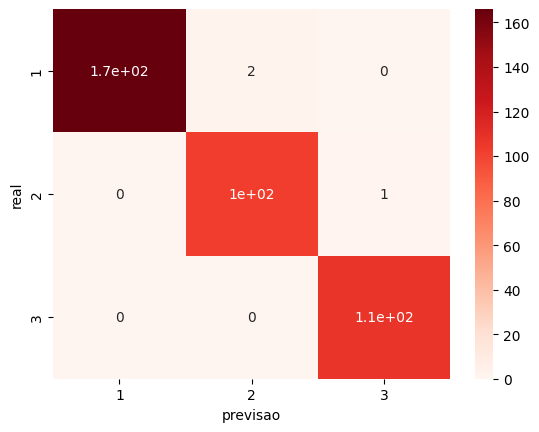

In [15]:
#confusion Matrix

tt=pd.DataFrame(regre_logistc_pred,columns=['real','previsao' ])

cf_matrix=pd.crosstab(tt['real'], tt['previsao'], rownames=['real'] , colnames=['previsao'])

sns.heatmap(cf_matrix, annot=True, cmap='Reds')

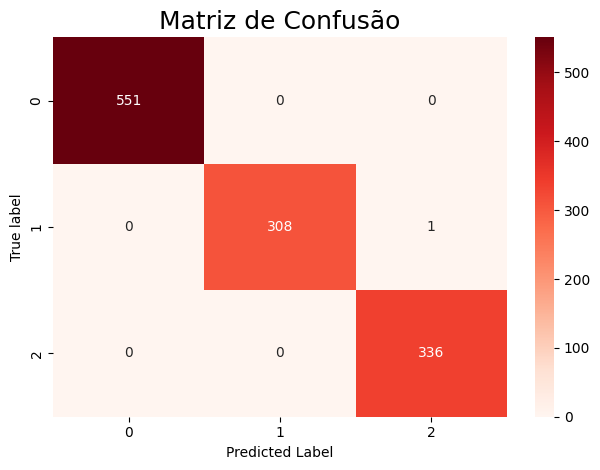

In [16]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

np.random.seed(SEED)
cv = StratifiedKFold(n_splits = 5, shuffle = True)

model = LogisticRegression(solver='liblinear')
y_pred = cross_val_predict(model, X_train, y_train, cv = cv)

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, 
            ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")
plt.tight_layout()

In [17]:
from sklearn.metrics import classification_report
# relatório do modelo
print('Relatório de classificação:\n', classification_report(y_train, y_pred, digits=4))

Relatório de classificação:
               precision    recall  f1-score   support

           1     1.0000    1.0000    1.0000       551
           2     1.0000    0.9968    0.9984       309
           3     0.9970    1.0000    0.9985       336

    accuracy                         0.9992      1196
   macro avg     0.9990    0.9989    0.9990      1196
weighted avg     0.9992    0.9992    0.9992      1196



In [34]:
from sklearn.metrics import classification_report
# relatório do modelo
print('Relatório de classificação:\n', classification_report(y_train, y_pred, digits=4))

Relatório de classificação:
               precision    recall  f1-score   support

           1     1.0000    1.0000    1.0000       551
           2     1.0000    0.9968    0.9984       309
           3     0.9970    1.0000    0.9985       336

    accuracy                         0.9992      1196
   macro avg     0.9990    0.9989    0.9990      1196
weighted avg     0.9992    0.9992    0.9992      1196



## Aqui em baixo antigo modelo

In [ ]:
# listando features categoricas e numéricas:
#categorical_attributes = list(df_model.select_dtypes(include=['object']).columns)
#numerical_attributes = list(df_model.select_dtypes(include=['float64', 'int64']).columns)
#print('categorical_attributes:', categorical_attributes)
#print('numerical_attributes:', numerical_attributes)

In [ ]:
#Deixar somente as variáveis numericas 
num_data  =df.drop(['partida_id','rodada','mandante', 'visitante', 'total_gols','vencedor'],axis=1)
num_data

In [ ]:
#separa as features 
features = num_data.drop(['resultado'],axis=1)
#separa as labels
labels = num_data['resultado']


print('Features')
print (features.head())

print (" ")
print ('#############')
print (" ")


print ('Labels')
print (labels.head()) 

In [ ]:
#transformando as formações em dados numericos
le = preprocessing.LabelEncoder()
le.fit(features['formacao_mandante'])
features['formacao_mandante'] = le.transform(features["formacao_mandante"])
features['formacao_visitante'] = le.transform(features["formacao_visitante"])

print('Features')
print (features.head())

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(features['clube_mandante'])
features['clube_mandante'] = le.transform(features["clube_mandante"])
features['clube_visitante'] = le.transform(features["clube_visitante"])

print('Features')
print (features.head())

In [ ]:
features.isna().sum()

In [ ]:
#Escoolhendo as melhores features com Kbest

features_list = ('formacao_mandante','formacao_visitante','mandante_placar','visitante_placar',
                 'chutes_mandante','chutes_no_alvo_mandante','posse_de_bola_mandante',
                 'passes_mandante','precisao_passes_mandante','faltas_mandante','cartao_amarelo_mandante',
                 'cartao_vermelho_mandante','impedimentos_mandante','escanteios_mandante',
                 'rodata_visitante','chutes_visitante','chutes_no_alvo_visitante','posse_de_bola_visitante',
                 'passes_visitante','precisao_passes_visitante','faltas_visitante','cartao_amarelo_visitante',
                 'cartao_vermelho_visitante','impedimentos_visitante','escanteios_visitante')


k_best_features = SelectKBest(k='all')
k_best_features.fit_transform(features, labels)
k_best_features_scores = k_best_features.scores_
raw_pairs = zip(features_list[1:], k_best_features_scores)
ordered_pairs = list(reversed(sorted(raw_pairs, key=lambda x: x[1])))

k_best_features_final = dict(ordered_pairs[:27])
best_features = k_best_features_final.keys()
print ('')
print ("Melhores features:")
print (k_best_features_final)

In [ ]:
#separa as features com base no Kbest
#oldfeatures  = num_data.drop(['cartao_amarelo_mandante', 'impedimentos_visitante', 'cartao_amarelo_visitante', 'temporada', 'rodata_visitante', 'precisao_passes_mandante', 'faltas_mandante', 'chutes_visitante', 'escanteios_mandante', 'cartao_vermelho_mandante', 'escanteios_visitante', 'chutes_no_alvo_mandante', 'cartao_vermelho_visitante'],axis=1)
features  = features.drop(['cartao_vermelho_visitante','escanteios_mandante','faltas_visitante', 'precisao_passes_mandante', 'passes_visitante', 'cartao_amarelo_visitante', 'cartao_vermelho_mandante', 'impedimentos_visitante', 'chutes_visitante', 'faltas_mandante','cartao_amarelo_mandante', 'posse_de_bola_visitante', 'chutes_no_alvo_visitante', 'rodata_visitante', 'impedimentos_mandante', 'chutes_no_alvo_mandante', 'posse_de_bola_mandante', 'formacao_visitante', 'mandante_placar', 'escanteios_visitante'],axis=1)

print('Features')
print (features.head())

print ('=========')

print ('Labels')
print (Y.head())

In [ ]:
#devido ao OVERFITING, estou realizando um Low Variance Filter como tentativa de resolução
#normalize = normalize(features) 
#data_scaled = pd.DataFrame(normalize)
#data_scaled.var()

In [ ]:
#storing the variance and name of variables
#variance = data_scaled.var()
#columns = features.columns

#print(variance)

In [ ]:
#saving the names of variables having variance more than a threshold value

#variable = [ ]

#or i in range(0,len(variance)):
#    if variance[i]>=0.0: #setting the threshold as 1%
#        variable.append(columns[i-1])


#variable

#for i in range(0,len(variance)):
#    print(variance[i])

In [ ]:
# criando um novo dataframe usando as variáveis ​​acima
#new_data = features[variable]

 # primeiras cinco linhas dos novos dados
#new_data.head() 

In [ ]:
# Normalizando os dados de entrada(features)
scaler = MinMaxScaler().fit(features)
X = scaler.transform(features)

print ('Features: ',X.shape)
print (X)

In [ ]:
# Realiza a divisão dos dados de treine e teste e deixa do espaço 2650 a 3090 para validação do ml
#X_train = features_scale[:2000 ]
#X_test = features_scale[2000:2650]
#y_train = labels[:2000]
#y_test = labels[2000:2650]

# Realiza a divisão de dados de treino e teste, separando 20% para teste

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

print( len(X_train), len(y_train))

print( len(X_test), len(y_test))

print(Y.shape)

In [ ]:
#Treinando e testando os modelos
print ('LogisticRegression')

clf_LR = LogisticRegression(multi_class='multinomial',max_iter=2000)
clf_LR.fit(X_train, y_train)
pred= clf_LR.predict(X_train)

lg_acc = accuracy_score(y_train, pred)
f1=f1_score(y_train,pred,average = 'micro')
print ('Acurácia LogisticRegression:{}'.format(lg_acc))
print ('F1 Score:{}'.format(f1) )

In [ ]:
#Testando LogistRegression hyper parameters

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid)

search.fit(X_train,y_train)
clf = search.best_estimator_
pred= clf.predict(X_train)
lg_acc = accuracy_score(y_train, pred)


f1=f1_score(y_train,pred,average = 'macro')

print ('Acurácia LogisticRegression:{}'.format(lg_acc))
print ('F1 Score:{}'.format(f1) )

print (clf)

In [ ]:
#Treinando e testando os modelos
print ('SVC')


clf = SVC()
clf.fit(X_train, y_train)
pred= clf.predict(X_train)

svc_acc = accuracy_score(y_train, pred)
f1=f1_score(y_train,pred, average='micro')
print ('Acurácia SVC:{}'.format(svc_acc))
print ('F1 Score:{}'.format(f1) )

In [ ]:
#Testando SVC hyper parameters

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

search = GridSearchCV(SVC(), param_grid)

search.fit(X_train,y_train)
clf_SVC = search.best_estimator_
pred= clf_SVC.predict(X_train)
acc = accuracy_score(y_train, pred)


f1=f1_score(y_train,pred,average = 'micro')

print ('F1 Score:{}'.format(f1))

print ('Acurácia LogisticRegression:{}'.format(acc))

print(clf_SVC)

In [ ]:
#Treinando e testando os modelos
print ('Decision Tree')


clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
pred= clf.predict(X_train)

dt_acc = accuracy_score(y_train, pred)
f1=f1_score(y_train,pred, average='macro')
print ('Acurácia Tree:{}'.format(dt_acc))
print ('F1 Score:{}'.format(f1) )


n_estimators = [10, 50, 100, 200]
max_depth = [3, 10, 20, 40]

In [ ]:
#Treinando e testando os modelos
print ('Naive baeys')


clf = GaussianNB()
clf.fit(X_train, y_train)
pred= clf.predict(X_train)

nb_acc = accuracy_score(y_train, pred)
f1=f1_score(y_train,pred, average='micro')
print ('Acurácia Naive baeys:{}'.format(nb_acc))
print ('F1 Score:{}'.format(f1) )

In [ ]:
from sklearn.model_selection import cross_val_score
SEED = 42
np.random.seed(SEED)
model = DecisionTreeClassifier(max_depth=3)
results = cross_val_score(model, X_train, 
                          y_train, cv = 5, scoring = 'accuracy')
def intervalo(results):
    mean = results.mean()
    dv = results.std()
    print('Acurácia média: {:.2f}%'.format(mean*100))
    print('Intervalo de acurácia: [{:.2f}% ~ {:.2f}%]'.format((mean - 2*dv)*100, (mean + 2*dv)*100))
    
intervalo(results)

In [ ]:
#Executando a previsao

previsao=features_scale[2650:]

game_id_full=df['partida_id']
game_id=game_id_full[2650:]

res_full=df['resultado']
res=res_full[2650:]


pred=clf_LR.predict(previsao)

df=pd.DataFrame({'real': res, 'previsao':pred, 'partida_id':game_id})

print(df)

In [ ]:
#confusion Matrix

df=pd.DataFrame(df,columns=['real','previsao' ])

cf_matrix=pd.crosstab(df['real'], df['previsao'], rownames=['real'] , colnames=['previsao'])

sns.heatmap(cf_matrix, annot=True, cmap='Reds')

In [ ]:
# relatório do modelo
print('Relatório de classificação:\n', classification_report(y_train, y_pred, digits=4))

In [ ]:
# Functions for plotting
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [ ]:
# Let's examine the distribution of the predicted values of the training data
Title = '-'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

In [ ]:


# Let's examine the distribution of the predicted values of the training data
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_test, yhat_teste, "Actual Values (teste)", "Predicted Values (teste)", Title)
